In [34]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
sns.set_context('talk')

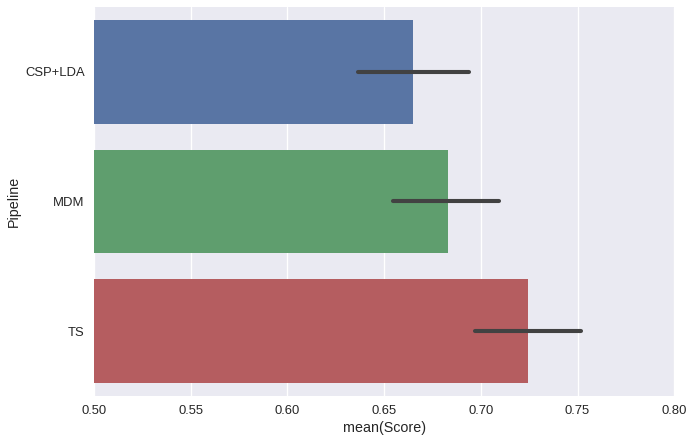

In [35]:
datasets = ['BNCI_2014_001', 'BNCI_2014_002', 'physionet']
pipelines = ['CSP+LDA', 'MDM', 'TS']

results = []
for dataset in datasets:
    for pipeline in pipelines:
        r = pd.read_csv('../results/MotorImagery/%s/%s.csv' % (dataset, pipeline), index_col=0)
        results.append(r)
results = pd.concat(results, ignore_index=True)
sns.barplot(y='Pipeline', x='Score', data=results)
plt.xlim(0.5, 0.8);

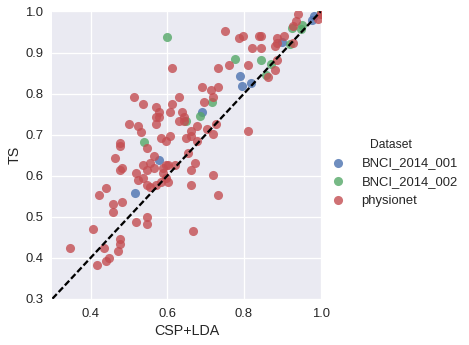

In [36]:
res = []
for dataset in datasets:
    results = []
    for pipeline in pipelines:
        r = pd.read_csv('../results/MotorImagery/%s/%s.csv' % (dataset, pipeline), index_col=0)
        results.append(r)
    results = pd.concat(results, ignore_index=True)
    results = results.pivot(values='Score', columns='Pipeline', index='Subject')
    results['Dataset'] = dataset
    res.append(results)
res = pd.concat(res)
sns.lmplot(data=res, x='CSP+LDA', y='TS', fit_reg=False, hue='Dataset')
plt.xlim(0.3, 1)
plt.ylim(0.3, 1)
plt.plot([0.3, 1], [0.3, 1], ls='--', c='k')

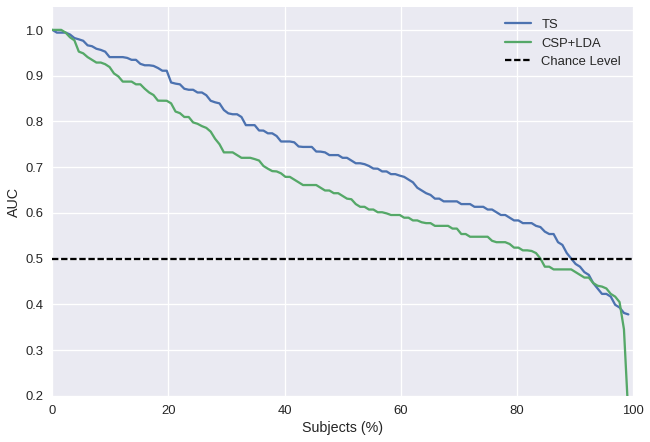

In [44]:
import numpy as np
per = (100. * np.arange(len(res))) / len(res)
plt.plot(per, np.sort(res['TS'].values)[::-1])
plt.plot(per, np.sort(res['CSP+LDA'].values)[::-1])
plt.ylim(0.2, 1.05)
plt.plot([0, 100], [0.5, 0.5], ls='--', c='k')
plt.legend(['TS', 'CSP+LDA', 'Chance Level'])
plt.xlim(0, 100)
plt.ylabel('AUC')
plt.xlabel('Subjects (%)');